# Brief Introduction about the Dataset

# Importing Neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  Import data from Jupyter Directory

In [2]:
data = pd.read_csv('neo.csv')
# How does the data look like?
data.sample(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
52700,3802591,(2018 GL4),0.105817,0.236614,78241.896135,1.211531e+07,Earth,False,22.00,False
69548,3879320,(2019 UY3),0.044932,0.100471,51315.834025,5.120633e+07,Earth,False,23.86,False
36871,2378526,378526 (2007 VH186),0.230438,0.515276,35794.389338,4.206610e+07,Earth,False,20.31,False
6002,3146501,(2003 AJ69),0.027833,0.062236,38112.138680,3.861051e+06,Earth,False,24.90,False
23232,54051175,(2020 QY),0.025384,0.056760,68094.604971,5.860623e+07,Earth,False,25.10,False


This dataset consists of both numerical as well as categorical data.

Numerical Columns : est_diameter_min,est_diameter_max,relative_velocity,miss_distance,bsolute_magnitude

Categorical Columns : orbiting_body, sentry_object,  hazardous(Target column)

id and name are Columns usefull for linking the data to real world object but are not usefull for estimating the danger of the space object.

In [3]:
# Removing id and name
data = data.drop(columns = ['id','name'])

In [4]:
#Now our data looks like this
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
# Evaluating data to reduce columns (Dimensionality reduction)
data['orbiting_body'].nunique()
# So apparently orbiting_body column has only one value i.e, Earth
#Therefore this columns can be removed

1

In [6]:
data['sentry_object'].nunique()
# Like orbiting_body , sentry_object column has also only one value i.e, False therefore it should be removed.

1

In [7]:
data = data.drop(columns = ['orbiting_body' , 'sentry_object' ])
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [8]:
#Now some basic info about shape of data and its data types
data.info()

#This clears that there are no missing values within the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


In [9]:
# Correlation between the Columns
data.corr()
# This shows that min_dia and max_dia are correlated very strongly. They behave in same way.Therefore we try using one of them.
# Our target column shows weak correlation with others

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000


In [10]:
data = data.drop(columns = ['est_diameter_min'])

In [11]:
# Coverting Categorical column into numerical column
for i in range(data.shape[0]):
    if(data.loc[i,'hazardous'] == False):
        data.loc[i,'hazardous'] = 0
    else:
        data.loc[i,'hazardous'] = 1

data.head()
# Now Our data looks like this.
        

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.594347,73588.726663,6.143813e+07,20.00,1
2,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.570217,42737.733765,4.627557e+07,20.09,1


# Data Visualization and Outliers Detection

0    0.902682
1    0.097318
Name: hazardous, dtype: float64


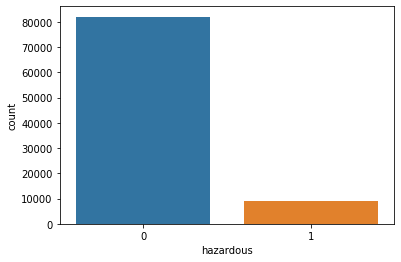

In [12]:
#Univariate analysis
sns.countplot(data['hazardous'])
print(data['hazardous'].value_counts() / data.shape[0])
# the data has almost 9.3:1 ratio of data points (An imbalanced dataset) 

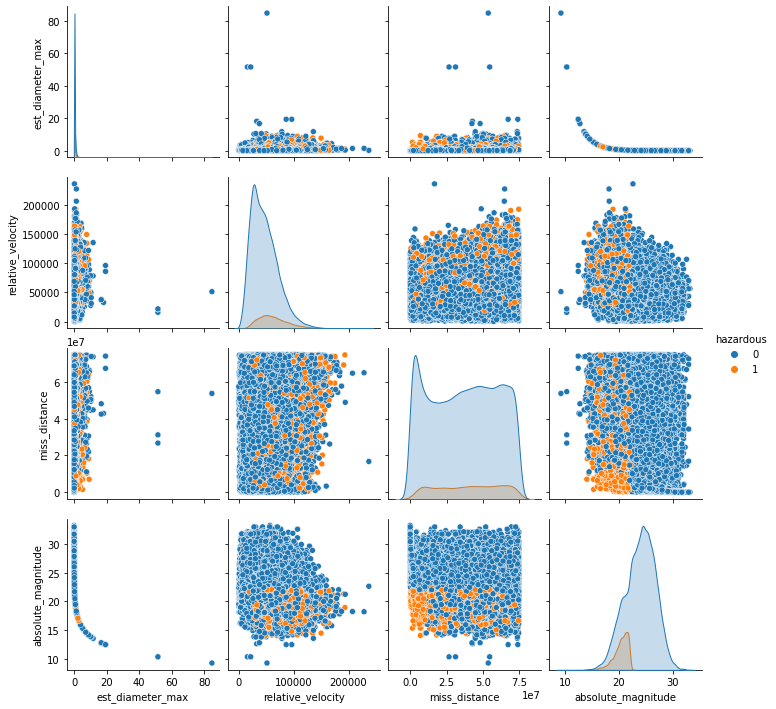

In [13]:
#bivariate analysis
sns.pairplot(data , hue = 'hazardous')

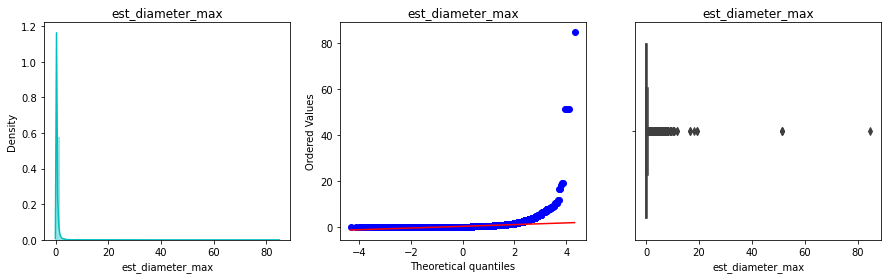

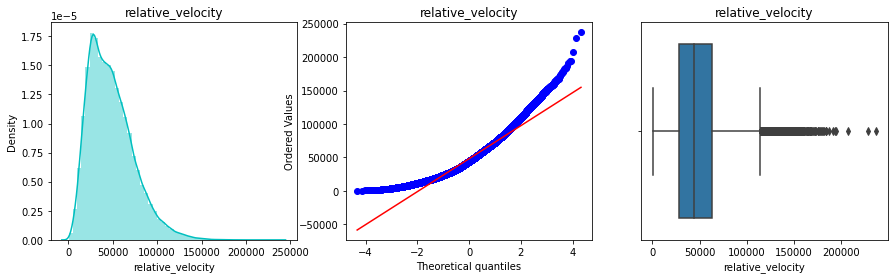

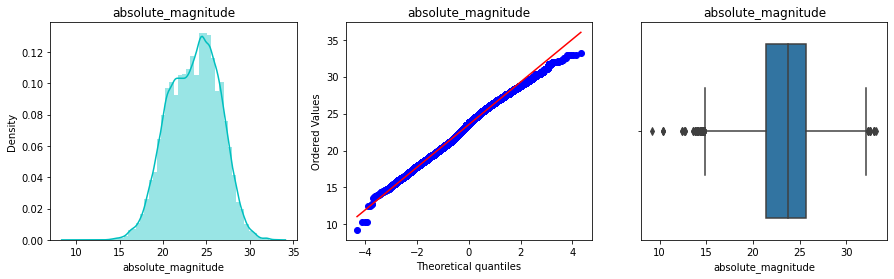

In [14]:
import scipy.stats as stats
iterables= ['est_diameter_max','relative_velocity','absolute_magnitude']

for iterable in iterables:
    plt.figure(figsize = (15,4))
    plt.subplot(131)
    sns.distplot(data[iterable], color = 'c')
    plt.title(iterable)
    
    plt.subplot(132)
    stats.probplot(data[iterable],plot = plt)
    plt.title(iterable)
    
    plt.subplot(133)
    sns.boxplot(data[iterable])
    plt.title(iterable)
    
    plt.show()

In [15]:
data.describe()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.284947,48066.918918,3.706655e+07,23.527103
std,0.667491,25293.296961,2.235204e+07,2.894086
min,0.001362,203.346433,6.745533e+03,9.230000
25%,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.320656,62923.604633,5.654900e+07,25.700000
max,84.730541,236990.128088,7.479865e+07,33.200000


In [16]:
# Capping (Replacting outliers with respect to there position with possible upper and lower limit)
iterables = ['est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']
for iterable in iterables:
    percentile_25 = data[iterable].quantile(0.25)
    percentile_75 = data[iterable].quantile(0.75)
    iqr = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5*iqr
    lower_limit = percentile_25 - 1.5*iqr
    for i in range(data.shape[0]):
        if data.loc[i,iterable] >= upper_limit:
            data.loc[i,iterable] = upper_limit
        elif data.loc[i,iterable] <= lower_limit:
            data.loc[i,iterable] = lower_limit
        else:
            data.loc[i,iterable] =data.loc[i,iterable]

In [17]:
data.describe()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.215828,47809.544547,3.706655e+07,23.527679
std,0.231385,24463.281441,2.235204e+07,2.891615
min,0.001362,203.346433,6.745533e+03,14.800000
25%,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.320656,62923.604633,5.654900e+07,25.700000
max,0.737056,114380.480615,7.479865e+07,32.240000


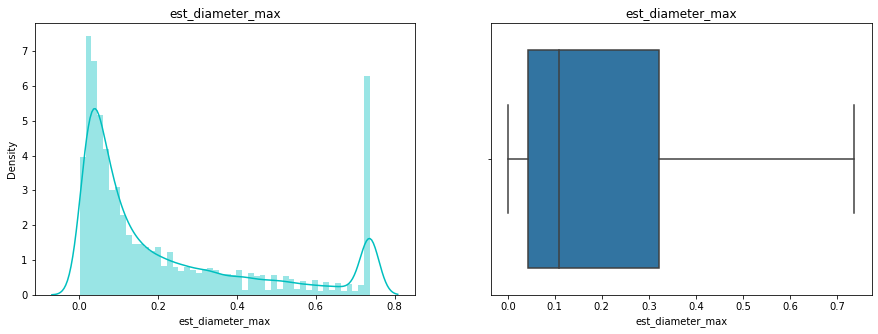

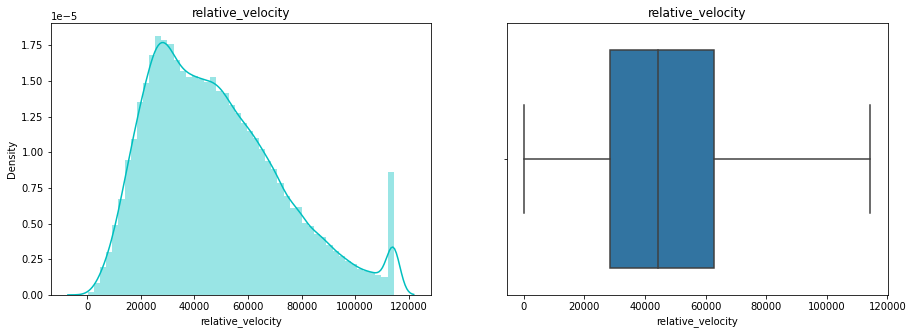

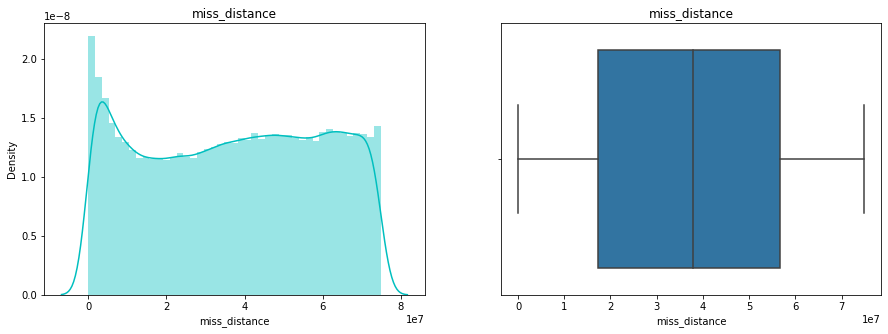

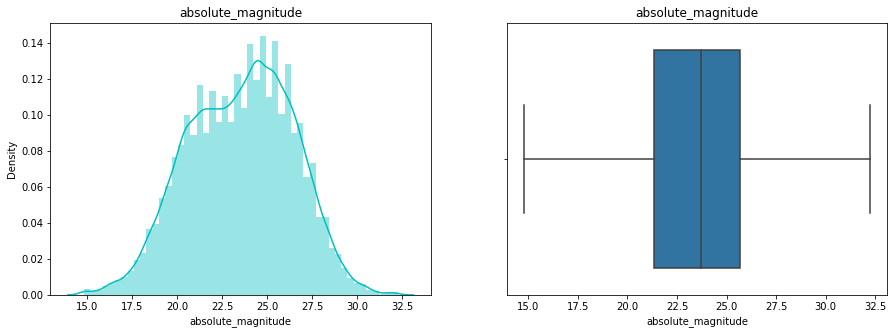

In [18]:
# Box plots and distribution plots after outlier detection
iterables = ['est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']

for iterable in iterables:
    plt.figure(figsize = (15,5))
    plt.subplot(121)
    sns.distplot(data[iterable], color = 'c')
    plt.title(iterable)
    
    plt.subplot(122)
    sns.boxplot(data[iterable])
    plt.title(iterable)
    
    plt.show()
    

# Splitting the data for training and testing

In [19]:
#Splitting the data for trainning and testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(data.drop(columns = ['hazardous']), data['hazardous'], 
                                                       test_size = 0.25 , random_state = 42)

In [20]:
#shape of resulting numpy arrays
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (68127, 4)
Shape of X_test (22709, 4)
Shape of y_train (68127,)
Shape of y_test (22709,)


# Normalizing and transforming the Data

In [21]:
from sklearn.preprocessing import PowerTransformer
obj = PowerTransformer()
X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)


# Trainning Models and evaluating accuracy scores

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay
clr1 = LogisticRegression()

In [31]:
y_train =y_train.astype(dtype = 'int') # changed type to int since initially it was pandas object
y_test =y_test.astype(dtype = 'int')
Combined_data_X = np.vstack((X_train,X_test)) # Whole datset inorder to find cross validation core
Combined_data_y = np.concatenate((y_train,y_test))

In [32]:
# Shape of Combined data
print('Shape of Combined_data_X', np.shape(Combined_data_X))
print('Shape of Combined_data_y', np.shape(Combined_data_y))


Shape of Combined_data_X (90836, 4)
Shape of Combined_data_y (90836,)


In [33]:
clr1.fit(X_train,y_train)
y_pred = clr1.predict(X_test)
accuracy_lr = accuracy_score(y_test,y_pred)
print(accuracy_lr)

0.9035184288167687


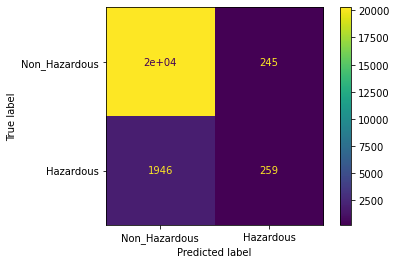

In [36]:
#Confusion Matrix
c_lr = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(c_lr, display_labels = ['Non_Hazardous','Hazardous'])
disp.plot()

In [37]:
from sklearn.model_selection import cross_val_score
cvs_lr = np.mean(cross_val_score(clr1,Combined_data_X,Combined_data_y,scoring = 'accuracy', cv = 10))
print(cvs_lr)

0.9017129953698204


# Using Decision Tree Classifier along with grid search cv

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
#Without any hyperparameter tunning fully grown tree
clr2 = DecisionTreeClassifier()
clr2.fit(X_train,y_train)
y_pred_dt = clr2.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(accuracy_dt)

0.8930820379585187


In [40]:
cvs_dt = np.mean(cross_val_score(clr2,Combined_data_X,Combined_data_y,scoring = 'accuracy', cv = 10))
print(cvs_dt)

0.8935885640586572


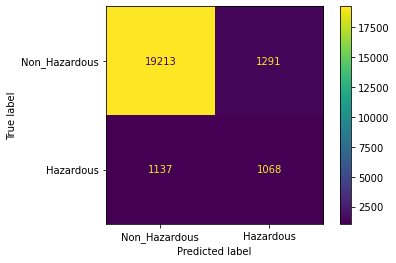

In [41]:
c_dt = confusion_matrix(y_test,y_pred_dt)
disp = ConfusionMatrixDisplay(c_dt, display_labels = ['Non_Hazardous','Hazardous'])
disp.plot()

In [42]:
parameters = {'max_depth' : (3,4,5,6,7,8),'min_samples_split' : (500,1000,1500,2000)}
from sklearn.model_selection import GridSearchCV
# GridearchCV searchers within all the combinations possible withing the given values
# of parameters and reflects back the the best parameters with repect to the given scoring criteria.

In [43]:
obj = GridSearchCV(clr2,param_grid = parameters , cv = 6 ,scoring = 'accuracy', verbose = True, n_jobs = -1)
obj.fit(Combined_data_X,Combined_data_y)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': (3, 4, 5, 6, 7, 8),
                         'min_samples_split': (500, 1000, 1500, 2000)},
             scoring='accuracy', verbose=True)

In [44]:
obj.cv_results_

{'mean_fit_time': array([0.28313637, 0.17845233, 0.20422661, 0.17522951, 0.21738966,
        0.22677759, 0.22389591, 0.21946955, 0.23096073, 0.21700009,
        0.22878234, 0.23638376, 0.26743201, 0.26035841, 0.23622111,
        0.24154913, 0.26281794, 0.25451012, 0.25201833, 0.23911985,
        0.26434974, 0.26558352, 0.2678841 , 0.244602  ]),
 'std_fit_time': array([0.05969282, 0.02000459, 0.01205555, 0.02682273, 0.01793731,
        0.01061245, 0.01659702, 0.01206977, 0.02157678, 0.00975927,
        0.01576746, 0.01044353, 0.0310536 , 0.03863597, 0.01821266,
        0.01026548, 0.02168174, 0.02105033, 0.01502653, 0.01242969,
        0.02035771, 0.02641349, 0.02069325, 0.02299424]),
 'mean_score_time': array([0.00373511, 0.00279466, 0.00464257, 0.00281986, 0.00301536,
        0.00248547, 0.00304814, 0.00273788, 0.00331716, 0.0029827 ,
        0.00265527, 0.00435936, 0.004957  , 0.00305704, 0.00339313,
        0.00488917, 0.00550127, 0.00331859, 0.0028983 , 0.00306698,
        0.002682

In [45]:
obj.best_score_ # Best possible score with given values of parameters

0.9125016531819088

In [46]:
obj.best_params_ # BEST PARAMETERS

{'max_depth': 4, 'min_samples_split': 500}

In [47]:
#Plotting decision tree with best parameters as found by grid search cv
from sklearn.tree import plot_tree

clr3 = DecisionTreeClassifier(max_depth = 4, min_samples_split=500)
clr3.fit(X_train,y_train)
y_pred_dt1 = clr3.predict(X_test)
best_accuracy_dt = accuracy_score(y_test,y_pred_dt1)
print(best_accuracy_dt)

0.9117530494517592


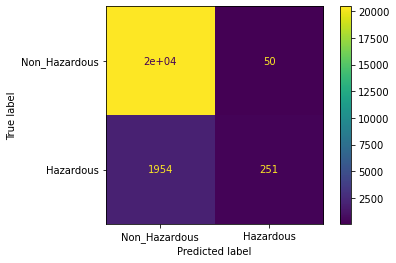

In [48]:
#Confusion Matrix
c_dt1 = confusion_matrix(y_test,y_pred_dt1)
disp = ConfusionMatrixDisplay(c_dt1, display_labels = ['Non_Hazardous','Hazardous'])
disp.plot()

In [49]:
#cross Validation
cvs_dt1 = np.mean(cross_val_score(clr3,Combined_data_X,Combined_data_y,scoring= 'accuracy', verbose = True))
print(cvs_dt1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9122264254019601


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


[Text(0.4583333333333333, 0.9, 'est_diameter_max <= 0.554\ngini = 0.176\nsamples = 68127\nvalue = [61492, 6635]\nclass = Non-Hazardous'),
 Text(0.22916666666666666, 0.7, 'absolute_magnitude <= -0.495\ngini = 0.002\nsamples = 46200\nvalue = [46153, 47]\nclass = Non-Hazardous'),
 Text(0.125, 0.5, 'absolute_magnitude <= -0.499\ngini = 0.092\nsamples = 748\nvalue = [712, 36]\nclass = Non-Hazardous'),
 Text(0.08333333333333333, 0.3, 'miss_distance <= -1.625\ngini = 0.076\nsamples = 738\nvalue = [709, 29]\nclass = Non-Hazardous'),
 Text(0.041666666666666664, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Non-Hazardous'),
 Text(0.125, 0.1, 'gini = 0.071\nsamples = 733\nvalue = [706, 27]\nclass = Non-Hazardous'),
 Text(0.16666666666666666, 0.3, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = Hazardous'),
 Text(0.3333333333333333, 0.5, 'est_diameter_max <= 0.476\ngini = 0.0\nsamples = 45452\nvalue = [45441, 11]\nclass = Non-Hazardous'),
 Text(0.25, 0.3, 'est_diameter_max <= 0.372\n

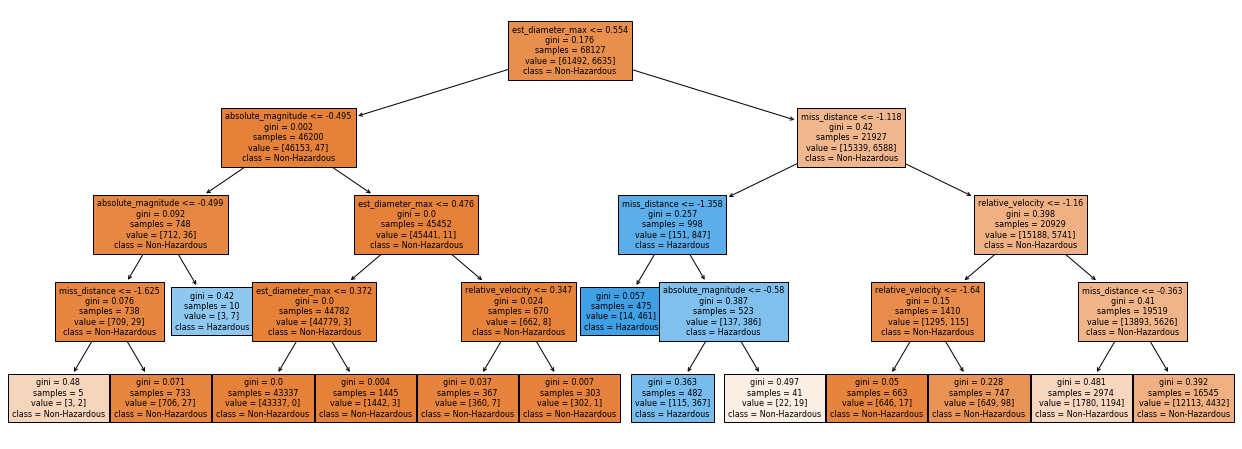

In [50]:
plt.figure(figsize=(22,8))
plot_tree(clr3,fontsize = 8,feature_names = data.columns[0:4], filled = True,
                               class_names= ['Non-Hazardous', 'Hazardous'])


Now we will be checking the dataset over SVC Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
clr4 = SVC()
clr4.fit(X_train,y_train)
y_pred_svc = clr4.predict(X_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print(accuracy_svc)

0.9113567308115725


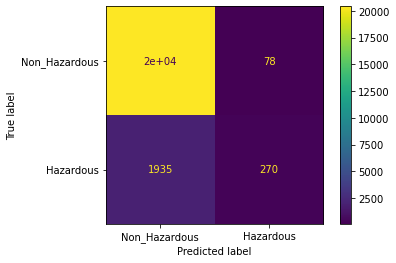

In [53]:
#Confusion Matrix
c_svc = confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(c_svc, display_labels = ['Non_Hazardous','Hazardous'])
disp.plot()

In [55]:
cvs_svc = np.mean(cross_val_score(clr4,Combined_data_X,Combined_data_y,cv = 6 , scoring='accuracy', verbose = True, n_jobs = -1))
print(cvs_svc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.9118411279315128


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  4.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  4.7min finished


Finally now we will be checking the accuracy of the Gaussian naive bayes clasifier on our dataset


In [56]:
from sklearn.naive_bayes import GaussianNB
clr5 = GaussianNB()
clr5.fit(X_train,y_train)
y_pred_nb = clr5.predict(X_test)
accuracy_nb = accuracy_score(y_test,y_pred_nb)
print(accuracy_nb)

0.8074772116781893


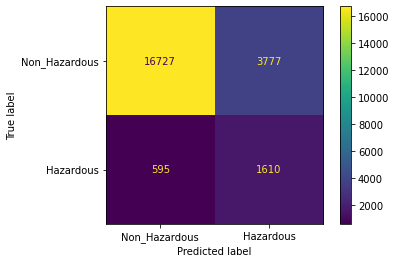

In [57]:
#Confusion Matrix
c_nb = confusion_matrix(y_test,y_pred_nb)
disp = ConfusionMatrixDisplay(c_nb, display_labels = ['Non_Hazardous','Hazardous'])
disp.plot()

In [59]:
#Cross_validating
cvs_nb = np.mean(cross_val_score(clr5,Combined_data_X,Combined_data_y,scoring = 'accuracy' , cv = 10, verbose = True , n_jobs = -1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [60]:
print(cvs_nb)

0.8087432874174286


# Summarizing

In [61]:
models_cvs = {'Model_name' : ['Logistic Regresion', 'Decision Tree Classifier' , 'Support Vector Classifier' , 'Naive Bayes Classifier'],
             'Accuracy' : [accuracy_lr,best_accuracy_dt,accuracy_svc,accuracy_nb],
             'Cross_val_score': [cvs_lr,cvs_dt1,cvs_svc,cvs_nb]} 
conclusion = pd.DataFrame(models_cvs)
conclusion

,Model_name,Accuracy,Cross_val_score
0,Logistic Regresion,0.903518,0.901713
1,Decision Tree Classifier,0.911753,0.912226
2,Support Vector Classifier,0.911357,0.911841
3,Naive Bayes Classifier,0.807477,0.808743
